<a href="https://colab.research.google.com/github/TanyaShamis1710/my_repo1/blob/hometask_3/Hometask_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 [0, 1, 1, 2, 4, 3, 6, 7, 8, 5]


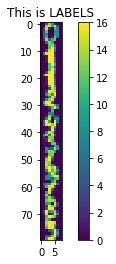

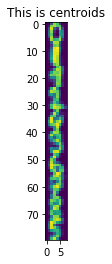

In [49]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def kmeans( data, k,p):
    centroids = data[:k,:]
    ds = data[:,np.newaxis]-centroids
    e_dists =  np.sqrt(np.sum(np.square(ds),axis=-1))
    cluster_allocs = np.argmin(e_dists, axis=1)
    cop=np.zeros(len(ds[1,:,1])*len(ds[:,1,1])*len(ds[1,1,:])).reshape(len(ds[:,1,1]),len(ds[1,:,1]),len(ds[1,1,:]))
    cop[np.arange(len(ds[:,1,1])),cluster_allocs,:]=ds[np.arange(len(ds[:,1,1])),cluster_allocs,:]
    new_centroids=((cop.sum(axis=0)))/np.bincount(cluster_allocs)[:,np.newaxis]+centroids
    step=0
    while  (np.array_equal(new_centroids, centroids)==False) and (step<p):
      centroids=new_centroids
      ds = data[:,np.newaxis]-centroids
      e_dists =  np.sqrt(np.sum(np.square(ds),axis=-1))

      cluster_allocs = np.argmin(e_dists, axis=1)
      
      cop=np.zeros(len(ds[1,:,1])*len(ds[:,1,1])*len(ds[1,1,:])).reshape(len(ds[:,1,1]),len(ds[1,:,1]),len(ds[1,1,:]))
      cop[np.arange(len(ds[:,1,1])),cluster_allocs,:]=ds[np.arange(len(ds[:,1,1])),cluster_allocs,:]
      new_centroids=((cop.sum(axis=0)))/np.bincount(cluster_allocs)[:,np.newaxis]+centroids
      step+=1
    clusters = [data[cluster_allocs==ci] for ci in range(len(centroids))] 
    z=np.max(e_dists[:,cluster_allocs])
    return [cluster_allocs,centroids]
  
digits = load_digits()
k=10
p=20
cluster_allocs=kmeans(digits.data, k,p)[0]
centroids=kmeans(digits.data, k,p)[1]
labels=[np.argmax(np.bincount(digits.target[cluster_allocs==ci])) for ci in range(k)]
print('                ',labels)
plt.title('This is LABELS')
plt.imshow(digits.images[labels].reshape(k*8,8)) 
plt.colorbar()
plt.show()
plt.show()
plt.title('This is centroids')
plt.imshow(centroids.reshape(8*k,8))
plt.show()    

In [4]:
def error_rate(cluster_allocs,digits,k):
  c=np.sum([np.sum(np.bincount(digits.target[cluster_allocs==ci])) for ci in range(k)])-np.sum([np.max(np.bincount(digits.target[cluster_allocs==ci])) for ci in range(k)])    
  return c/len(digits.data[:,1])
print(error_rate(cluster_allocs,digits,k))

0.20868113522537562


[[177.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0. 154.   4.   0.  10.   0.   3.   2.  16.  20.]
 [  0.  25. 148.   2.   0.   0.   0.   0.   3.   0.]
 [  0.   0.  12. 161.   0.  39.   0.   0.  13. 145.]
 [  1.   0.   0.   0. 161.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   1.   0. 140.   0.   4.   3.   5.]
 [  0.   2.   0.   0.   0.   2. 176.   0.   1.   0.]
 [  0.   0.   2.   8.   8.   0.   0. 170.   3.   8.]
 [  0.   0.  10.  11.   2.   0.   1.   3. 135.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
1797.0


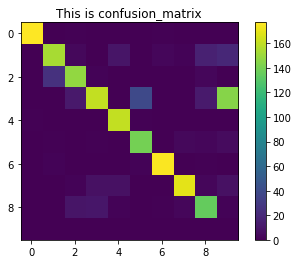

In [5]:
def confusion_matrix(digits, cluster_allocs,labels):
  
  a=np.zeros(10*max(k,10)).reshape(max(k,10),10)
  g=np.array([np.bincount(digits.target[cluster_allocs==ci],minlength=10) for ci in range(k)]).reshape(k,10)
  for i in range(k):
    a[labels[i],:]+=g[i,:]
  return a
print(confusion_matrix(digits,cluster_allocs,labels))
print(np.sum(confusion_matrix(digits,cluster_allocs,labels)))   
plt.imshow(confusion_matrix(digits,cluster_allocs,labels))
plt.title('This is confusion_matrix')

plt.colorbar()
plt.show()

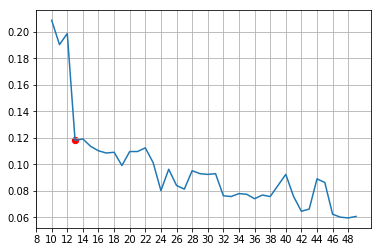

In [56]:
X = np.arange(10,50)
plt.grid()
plt.yticks(np.arange(0,1.2,0.02))
plt.xticks(np.arange(2,50,2))
v=[error_rate(kmeans(digits.data, i,p)[0],digits,i) for i in X]
plt.plot(X,v)
plt.scatter(13,v[13-X[0]], color='red',s=40,marker='o')
plt.show()

Оптимальный k: 13


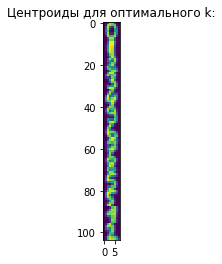

Цифры для оптимального k: [0, 1, 8, 3, 4, 9, 6, 7, 8, 5, 5, 1, 2]


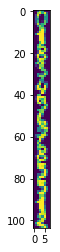

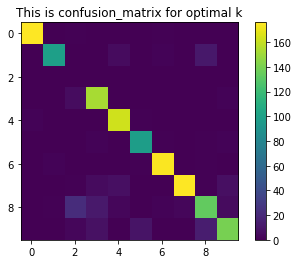

In [58]:
centroids=kmeans(digits.data, 13,p)[1]
print('Оптимальный k:',13)
plt.title('Центроиды для оптимального k:')
plt.imshow(centroids.reshape(8*13,8))
plt.show()    
cluster_allocs=kmeans(digits.data,13,p)[0]
labels=[np.argmax(np.bincount(digits.target[cluster_allocs==ci])) for ci in range(13)]
print('Цифры для оптимального k:',labels)
plt.imshow(digits.images[labels].reshape(13*8,8)) 
plt.show()
plt.imshow(confusion_matrix(digits,cluster_allocs,labels))
plt.title('This is confusion_matrix for optimal k')

plt.colorbar()

plt.show()